# Predicción tenis

## 1. Carga dataset y limpieza de datos

In [22]:
import pandas as pd
df1 = pd.read_csv("match_scores_1991-2016_unindexed_csv.csv")

df2 = pd.read_csv("match_stats_1991-2016_unindexed_csv.csv")

df = pd.merge(df1, df2, on='match_id')
df = df.drop_duplicates(subset=["match_id"], keep=False)

df = df.loc[(df["winner_name"] == "Rafael Nadal") | (df["loser_name"] == "Rafael Nadal") ]

df

,tourney_year_id,tourney_order_x,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,...,loser_second_serve_return_won,loser_second_serve_return_total,loser_break_points_converted,loser_break_points_return_total,loser_service_games_played,loser_return_games_played,loser_return_points_won,loser_return_points_total,loser_total_points_won,loser_total_points_total
36108,2002-7306,26,mallorca,/en/scores/archive/mallorca/7306/2002/results,Round of 16,4,7,Olivier Rochus,r397,olivier-rochus,...,2.0,14.0,0.0,0.0,8.0,8.0,13.0,48.0,43.0,107.0
36121,2002-7306,26,mallorca,/en/scores/archive/mallorca/7306/2002/results,Round of 32,5,12,Rafael Nadal,n409,rafael-nadal,...,4.0,7.0,3.0,9.0,10.0,10.0,27.0,66.0,55.0,125.0
38767,2003-410,23,monte-carlo,/en/scores/archive/monte-carlo/410/2003/results,Round of 16,4,5,Guillermo Coria,c524,guillermo-coria,...,14.0,29.0,3.0,8.0,10.0,10.0,28.0,66.0,55.0,122.0
38773,2003-410,23,monte-carlo,/en/scores/archive/monte-carlo/410/2003/results,Round of 32,5,3,Rafael Nadal,n409,rafael-nadal,...,12.0,26.0,3.0,17.0,10.0,11.0,42.0,96.0,75.0,163.0
38813,2003-410,23,monte-carlo,/en/scores/archive/monte-carlo/410/2003/results,Round of 64,6,27,Rafael Nadal,n409,rafael-nadal,...,6.0,16.0,0.0,3.0,7.0,8.0,12.0,47.0,31.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91206,2016-560,53,us-open,/en/scores/archive/us-open/560/2016/results,Round of 128,7,4,Rafael Nadal,n409,rafael-nadal,...,16.0,32.0,1.0,5.0,13.0,12.0,24.0,76.0,65.0,157.0
91537,2016-747,58,beijing,/en/scores/archive/beijing/747/2016/results,Quarter-Finals,3,2,Grigor Dimitrov,d875,grigor-dimitrov,...,8.0,15.0,2.0,5.0,9.0,9.0,20.0,54.0,52.0,119.0
91541,2016-747,58,beijing,/en/scores/archive/beijing/747/2016/results,Round of 16,4,2,Rafael Nadal,n409,rafael-nadal,...,11.0,29.0,1.0,3.0,9.0,10.0,25.0,74.0,64.0,145.0
91549,2016-747,58,beijing,/en/scores/archive/beijing/747/2016/results,Round of 32,5,2,Rafael Nadal,n409,rafael-nadal,...,6.0,18.0,0.0,2.0,7.0,7.0,11.0,42.0,28.0,84.0


In [4]:
df.columns

Index(['tourney_year_id', 'tourney_order_x', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix_x', 'tourney_order_y',
       'match_stats_url_suffix_y', 'match_time', 'match_duration',
       'winner_aces', 'winner_double_faults', 'winner_first_serves_in',
       'winner_first_serves_total', 'winner_first_serve_points_won',
       'winner_first_serve_points_total', 'winner_second_serve_points_won',
       'winner_second_serve_points_total', 'winner_break_points_saved',
       'winner_break_points_serve_total', 'winner_service_points_won',
       'winner_service_points_total', 'winner_first_serv

In [5]:
df["tourney_year_id"] = df["tourney_year_id"].str.slice(0,4)
df["tourney_year_id"] = pd.to_numeric(df["tourney_year_id"])
df["tourney_year_id"]

36108    2002
36121    2002
38767    2003
38773    2003
38813    2003
         ... 
91206    2016
91537    2016
91541    2016
91549    2016
91636    2016
Name: tourney_year_id, Length: 957, dtype: int64

In [6]:
import numpy as np
df['Ganar'] = np.where(df["winner_name"] == "Rafael Nadal", 1, 0)

conditions = [
    (df["winner_name"] != "Rafael Nadal"),
    (df["loser_name"] != "Rafael Nadal")
]

values = [
    (df["winner_name"]),
    (df["loser_name"])
]

df['Oponent'] = np.select(conditions, values)

In [7]:
counts = df['Oponent'].value_counts()
others = counts[counts < 10].index

df['Oponent'] = df['Oponent'].astype('category')
label = "uncommon"
df['Oponent'] = df['Oponent'].cat.add_categories([label])
df['Oponent'] = df['Oponent'].replace(others, label)
df["Oponent"].nunique()

22

In [8]:
df['Oponent'].value_counts()

uncommon                 591
Novak Djokovic            48
Roger Federer             34
David Ferrer              30
Andy Murray               24
Tomas Berdych             22
Fernando Verdasco         18
Stan Wawrinka             18
Mikhail Youzhny           17
Nicolas Almagro           15
Gael Monfils              14
Philipp Kohlschreiber     14
Feliciano Lopez           13
Richard Gasquet           13
Juan Martin del Potro     12
Kei Nishikori             11
Lleyton Hewitt            11
Jo-Wilfried Tsonga        11
Nikolay Davydenko         11
Fernando Gonzalez         10
Paul-Henri Mathieu        10
Fabio Fognini             10
Name: Oponent, dtype: int64

In [9]:
df.columns

Index(['tourney_year_id', 'tourney_order_x', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix_x', 'tourney_order_y',
       'match_stats_url_suffix_y', 'match_time', 'match_duration',
       'winner_aces', 'winner_double_faults', 'winner_first_serves_in',
       'winner_first_serves_total', 'winner_first_serve_points_won',
       'winner_first_serve_points_total', 'winner_second_serve_points_won',
       'winner_second_serve_points_total', 'winner_break_points_saved',
       'winner_break_points_serve_total', 'winner_service_points_won',
       'winner_service_points_total', 'winner_first_serv

In [10]:
df.drop(['tourney_order_x', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'match_id',
       'match_stats_url_suffix_x', 'tourney_order_y',
       'match_stats_url_suffix_y', 'match_time'],
        axis=1, inplace=True)

In [11]:
df = pd.get_dummies(df)
df.tail()

,tourney_year_id,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_duration,winner_aces,winner_double_faults,...,Oponent_Nicolas Almagro,Oponent_Nikolay Davydenko,Oponent_Novak Djokovic,Oponent_Paul-Henri Mathieu,Oponent_Philipp Kohlschreiber,Oponent_Richard Gasquet,Oponent_Roger Federer,Oponent_Stan Wawrinka,Oponent_Tomas Berdych,Oponent_uncommon
91206,2016,3,0,18,7,0,0,128.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,1
91537,2016,2,0,12,6,0,0,93.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,1
91541,2016,2,0,13,7,1,0,112.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,1
91549,2016,2,0,12,2,0,0,64.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,1
91636,2016,2,0,13,9,1,0,94.0,11.0,2.0,...,0,0,0,0,0,0,0,0,0,1


## 2. Modelamiento

In [12]:
df.head()

,tourney_year_id,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_duration,winner_aces,winner_double_faults,...,Oponent_Nikolay Davydenko,Oponent_Novak Djokovic,Oponent_Paul-Henri Mathieu,Oponent_Philipp Kohlschreiber,Oponent_Richard Gasquet,Oponent_Roger Federer,Oponent_Stan Wawrinka,Oponent_Tomas Berdych,Oponent_uncommon,weight
36108,2002,2,0,12,4,0,0,62.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0.993056
36121,2002,2,0,12,8,0,0,83.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0.993056
38767,2003,2,0,13,8,1,0,94.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.993552
38773,2003,2,0,13,8,0,0,120.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0.993552
38813,2003,2,0,12,3,0,0,63.0,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0.993552


In [14]:
#test size es el tamaño del test en % y random state es seed 
x_train = df.loc[df["tourney_year_id"] != 2016]
x_train = df.drop("Ganar", axis=1)

x_test = df.loc[df["tourney_year_id"] == 2016]
x_test = df.drop("Ganar", axis=1)

y_train = df.loc[df["tourney_year_id"] != 2016]
y_train = df["Ganar"]

y_test = df.loc[df["tourney_year_id"] == 2016]
y_test = df["Ganar"]

# esto para ver filas y columnas y ver que la división está bien hecha
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(957, 79) (957, 79) (957,) (957,)


In [15]:
weights = x_train["tourney_year_id"]/2016

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, plot_roc_curve
from matplotlib import pyplot as plt

In [20]:
rf = RandomForestClassifier(random_state=212, n_estimators=50, max_depth=10, min_samples_split=8, min_samples_leaf=4, 
                           oob_score=True)
rf.fit(x_train, y_train, sample_weight=weights)
y_predictiondata = rf.predict(x_test)

acc = accuracy_score(y_test,y_predictiondata)*100
con_mat = confusion_matrix(y_test,y_predictiondata)
prec = precision_score(y_test,y_predictiondata)
recall = recall_score(y_test,y_predictiondata)
print("Accuracy: ",acc)
print("Precision: ",prec)
print("Recall: ",recall)
print(con_mat)

Accuracy:  96.1337513061651
Precision:  0.9571603427172583
Recall:  0.9974489795918368
[[138  35]
 [  2 782]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Tasa de verdaderos positivos')

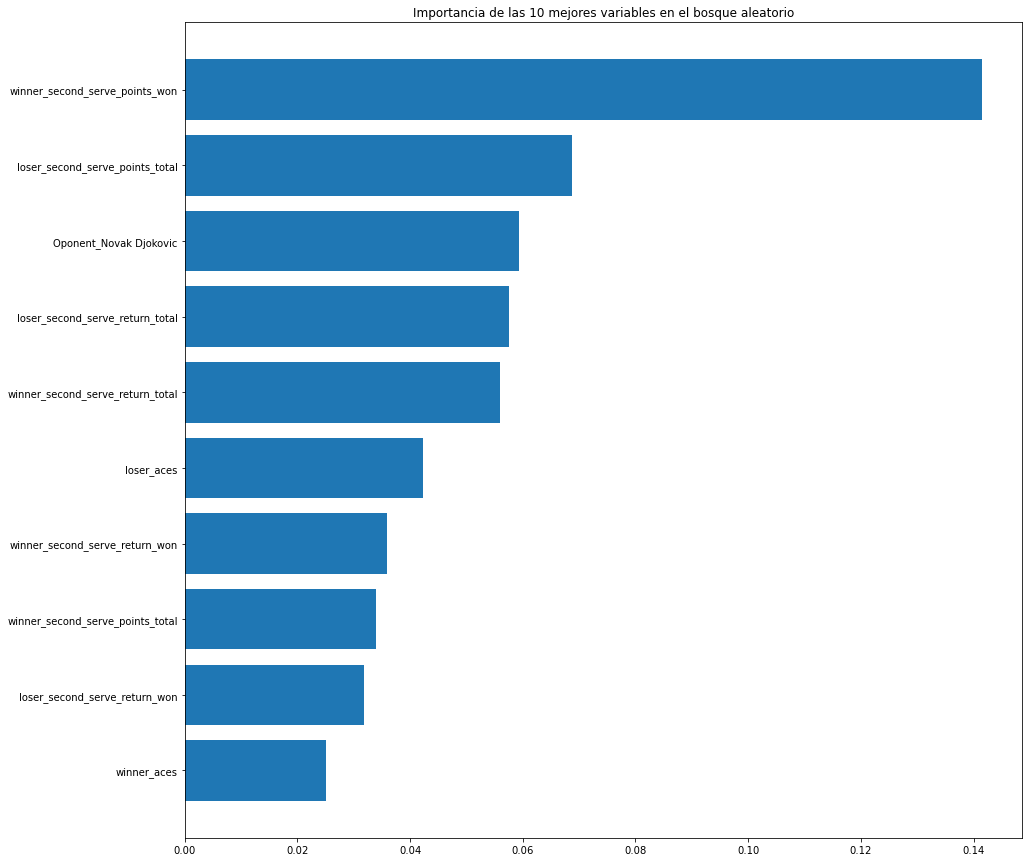

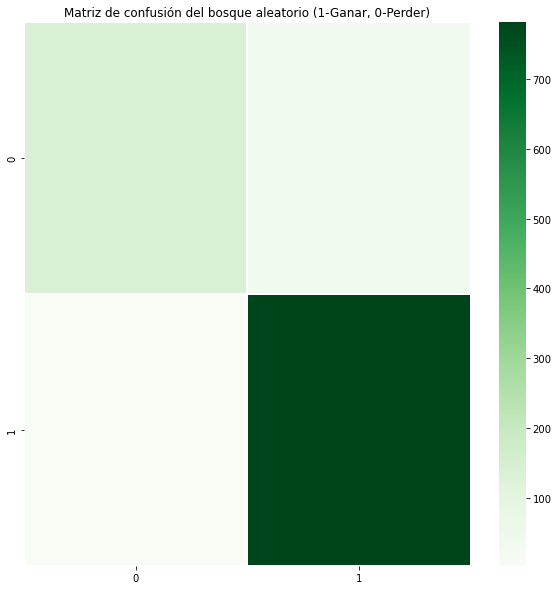

<Figure size 720x720 with 0 Axes>

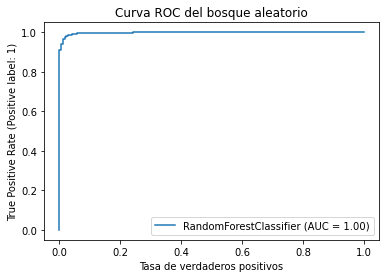

In [23]:
from sklearn.inspection import permutation_importance
import seaborn as sns

features = pd.DataFrame(rf.feature_importances_, x_train.columns).reset_index()
features.rename(columns = {'index':'ftr', 0:'point'}, inplace = True)
features = features.sort_values("point", ascending=False).head(10)

plt.figure(figsize=(15, 15))
plt.barh(features["ftr"], sorted(features["point"]))
plt.title("Importancia de las 10 mejores variables en el bosque aleatorio")

plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
plt.title("Matriz de confusión del bosque aleatorio (1-Ganar, 0-Perder)")

plt.figure(figsize=(10, 10));
plot_roc_curve(rf, x_test, y_test)
plt.title("Curva ROC del bosque aleatorio")
plt.xlabel("Tasa de falsos positivos")
plt.xlabel("Tasa de verdaderos positivos")